generate data for time 20


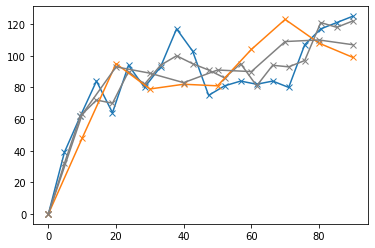

In [3]:
import pyabc
from study_abc_noise.model import MRNATranscriptionModelVars as ModelVars
import matplotlib.pyplot as plt
import numpy as np
import os
import logging
import pickle
%matplotlib inline

# for debugging
for module in ['Distance', 'Acceptor', 'Epsilon']:
    logger = logging.getLogger(module)
    logger.setLevel(logging.DEBUG)
    fh = logging.FileHandler('log/logger_laplace.log')
    fh.setLevel(logging.DEBUG)
    logger.addHandler(fh)

arr_n_t = [3, 5, 10, 15, 30, 100]
arr_n_t = [10, 20]

# create data
for n_t in reversed(arr_n_t):
    fn = f"data/data_{n_t}_poisson.p"
    mv = ModelVars(n_t=n_t, noise_model='poisson')
    if not os.path.isfile(fn):
        print(f"generate data for time {n_t}")
        data_exact = mv.get_model()(mv.p_true)
        data = mv.add_noise_to_data(data_exact)
        pickle.dump((data_exact, data), open(fn, "wb"))
    data_exact, data = pickle.load(open(fn, "rb"))
    plt.plot(data['t'], data['mrna'], 'x-')
    plt.plot(data['t'], data_exact['mrna'], 'x-', color='grey')

CPU times: user 248 ms, sys: 17.5 ms, total: 265 ms
Wall time: 224 ms


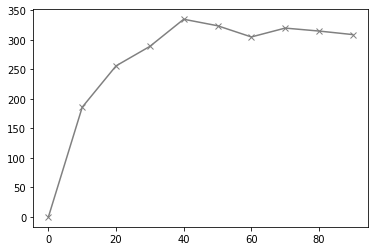

In [90]:
%%time
mv = ModelVars(n_t=n_t, noise_success_probability=.9)
data_exact = mv.get_model()({'transcription': 30, 'decay': .1})
plt.plot(data['t'], data_exact['mrna'], 'x-', color='grey')

In [25]:
print(mv.p_true)

OrderedDict([('transcription', 10), ('decay', 0.1)])
